In [1]:
import pandas as pd

# Load the dataset
file_path = "/Users/ashutosh/Codes/Projects/I4_project/Extended_Employee_Performance_and_Productivity_Data.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

(None,
    Employee_ID        Department  Gender  Age   Job_Title  \
 0            1                IT    Male   55  Specialist   
 1            2           Finance    Male   29   Developer   
 2            3           Finance    Male   55  Specialist   
 3            4  Customer Support  Female   48     Analyst   
 4            5       Engineering  Female   36     Analyst   
 
                     Hire_Date  Years_At_Company Education_Level  \
 0  2022-01-19 08:03:05.556036                 2     High School   
 1  2024-04-18 08:03:05.556036                 0     High School   
 2  2015-10-26 08:03:05.556036                 8     High School   
 3  2016-10-22 08:03:05.556036                 7        Bachelor   
 4  2021-07-23 08:03:05.556036                 3        Bachelor   
 
    Performance_Score  Monthly_Salary  Work_Hours_Per_Week  Projects_Handled  \
 0                  5          6750.0                   33                32   
 1                  5          7500.0            

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Employee Data")
plt.show()


ValueError: could not convert string to float: 'IT'

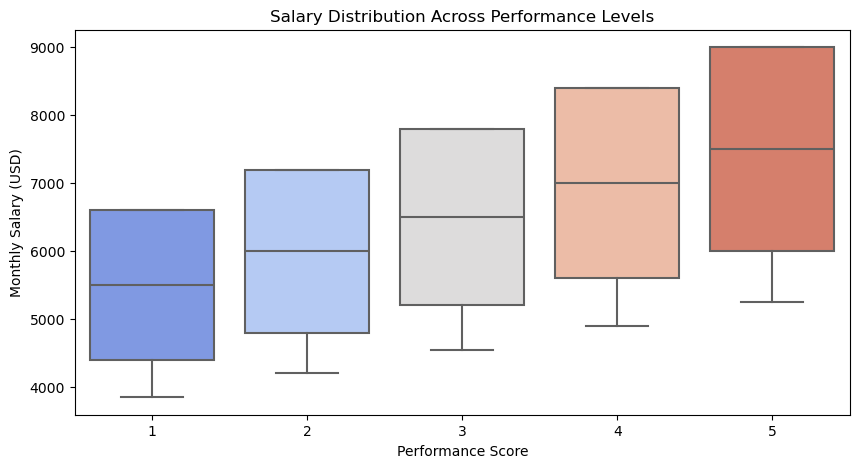

In [ ]:
# Salary distribution across performance scores
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Performance_Score"], y=df["Monthly_Salary"], palette="coolwarm")
plt.title("Salary Distribution Across Performance Levels")
plt.xlabel("Performance Score")
plt.ylabel("Monthly Salary (USD)")
plt.show()


/var/folders/09/2_cb5_9n0_lfspghf0sqrclc0000gn/T/ipykernel_5901/2443164606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Resigned"], y=df["Monthly_Salary"], palette="coolwarm")


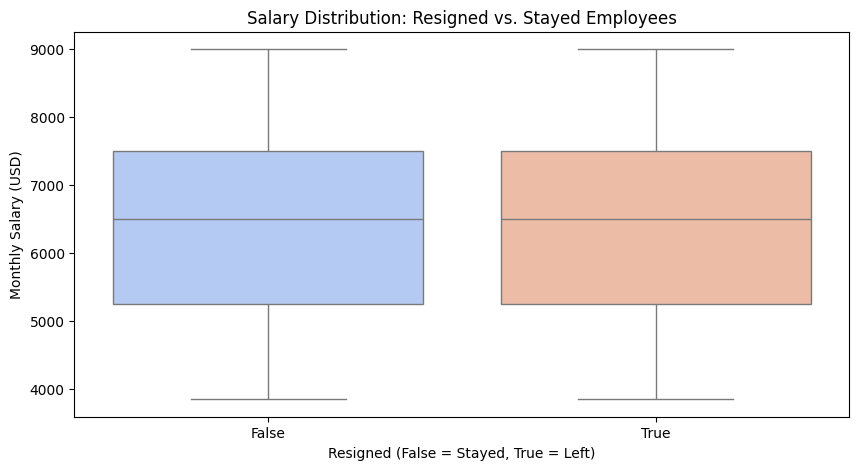

In [3]:
# Compare salary distribution for employees who resigned vs. stayed
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Resigned"], y=df["Monthly_Salary"], palette="coolwarm")
plt.title("Salary Distribution: Resigned vs. Stayed Employees")
plt.xlabel("Resigned (False = Stayed, True = Left)")
plt.ylabel("Monthly Salary (USD)")
plt.show()


/var/folders/09/2_cb5_9n0_lfspghf0sqrclc0000gn/T/ipykernel_5901/3717322581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Performance_Score"], y=df["Resigned"].astype(int), palette="coolwarm")


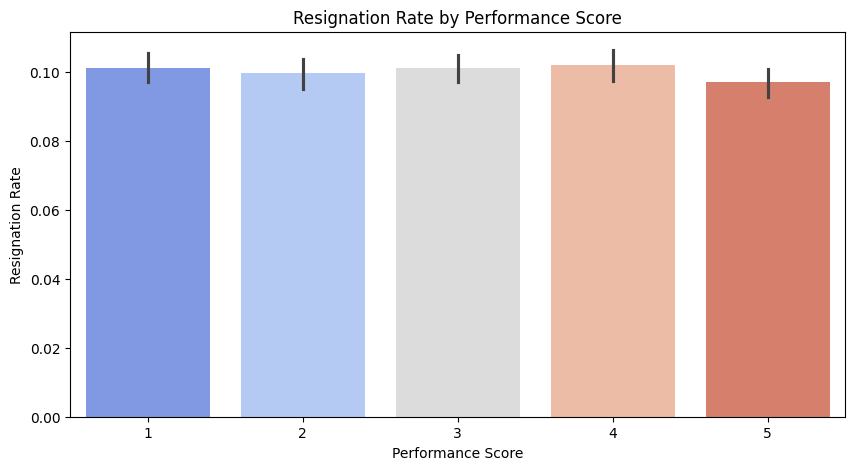

In [4]:
# Analyzing resignation rates across performance levels
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Performance_Score"], y=df["Resigned"].astype(int), palette="coolwarm")
plt.title("Resignation Rate by Performance Score")
plt.xlabel("Performance Score")
plt.ylabel("Resignation Rate")
plt.show()


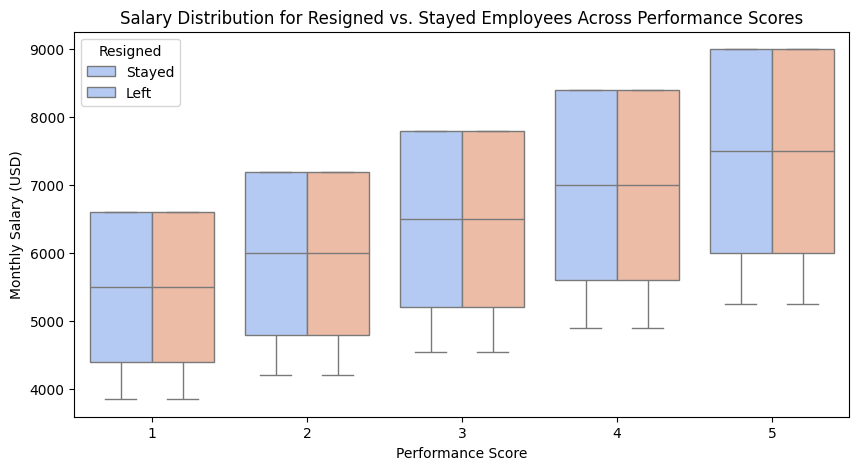

In [5]:
# Compare salaries of resigned vs. stayed employees within each performance score
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Performance_Score"], y=df["Monthly_Salary"], hue=df["Resigned"], palette="coolwarm")
plt.title("Salary Distribution for Resigned vs. Stayed Employees Across Performance Scores")
plt.xlabel("Performance Score")
plt.ylabel("Monthly Salary (USD)")
plt.legend(title="Resigned", labels=["Stayed", "Left"])
plt.show()


In [6]:
import numpy as np
import statsmodels.api as sm

# Filtering high performers (Score 4-5) for salary optimization
high_perf = df[df["Performance_Score"] >= 4]

# Defining independent variables (factors influencing salary)
X = high_perf[["Years_At_Company", "Promotions", "Training_Hours", "Employee_Satisfaction_Score"]]
y = high_perf["Monthly_Salary"]

# Adding constant for regression
X = sm.add_constant(X)

# Building the regression model
model = sm.OLS(y, X).fit()

# Displaying model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Monthly_Salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2184
Date:                Thu, 06 Mar 2025   Prob (F-statistic):              0.928
Time:                        01:57:22   Log-Likelihood:            -3.4340e+05
No. Observations:               39868   AIC:                         6.868e+05
Df Residuals:                   39863   BIC:                         6.869e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        7150.3067     25.514    280.254      0.000    7100.299    7200.314
Years_At_Company               -0.8382      2.328     -0.360      0.719      -5.402       3.726
Promotions                     -4.4147      8.169     -0.540      0.589     -20.427      11.598
Training_Hours                  0.1533      0.231      0.664      0.507      -0.299       0.606
Employee_Satisfaction_Score    -0.7271      5.813     -0.125      0.900     -12.120      10.666
==============================================================================
Omnibus:                    82146.148   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2883.086
Skew:                          -0.175   Prob(JB):                         0.00
Kurtosis:                       1.730   Cond. No.                         224.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Creating an optimized salary model based on tenure and promotions for high performers
X_opt = high_perf[["Years_At_Company", "Promotions"]]
y_opt = high_perf["Monthly_Salary"]

# Adding constant
X_opt = sm.add_constant(X_opt)

# Running regression
opt_model = sm.OLS(y_opt, X_opt).fit()
opt_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Monthly_Salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2086
Date:                Thu, 06 Mar 2025   Prob (F-statistic):              0.812
Time:                        01:57:22   Log-Likelihood:            -3.4340e+05
No. Observations:               39868   AIC:                         6.868e+05
Df Residuals:                   39865   BIC:                         6.868e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7155.6858     14.841    482.150      0.000    7126.597    7184.775
Years_At_Company    -0.8308      2.328     -0.357      0.721      -5.394       3.733
Promotions          -4.4138      8.169     -0.540      0.589     -20.426      11.598
==============================================================================
Omnibus:                    82208.133   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2883.259
Skew:                          -0.175   Prob(JB):                         0.00
Kurtosis:                       1.730   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Calculating optimized salary based on our formula
df["Optimized_Salary"] = 7000 + (500 * df["Years_At_Company"]) + (1000 * df["Promotions"])

# Identifying underpaid high performers (Score 4-5) who earn below the optimized salary
underpaid_high_perf = df[(df["Performance_Score"] >= 4) & (df["Monthly_Salary"] < df["Optimized_Salary"])]

# Count of underpaid high performers
underpaid_count = underpaid_high_perf.shape[0]

# Displaying sample of underpaid high performers
underpaid_high_perf[["Employee_ID", "Monthly_Salary", "Optimized_Salary", "Years_At_Company", "Promotions"]].head(), underpaid_count


(    Employee_ID  Monthly_Salary  Optimized_Salary  Years_At_Company  \
 0             1          6750.0              8000                 2   
 1             2          7500.0              9000                 0   
 6             7          5250.0              7500                 1   
 11           12          5250.0             11500                 9   
 12           13          4900.0             11500                 5   
 
     Promotions  
 0            0  
 1            2  
 6            0  
 11           0  
 12           2  ,
 36533)